# METODY EKSPLORACJI DANYCH
## Laboratorium. Modele logitowe. Regresja logistyczna

### Zadanie 1

#### Wczytanie bibliotek i danych

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import statsmodels.api as sm

Traktujemy stan cywilny jako zmienną binarną - 0 dla osób stanu wolnego i 1 dla osób będących w związku małżeńskim

In [2]:
stanCywilny = pd.read_excel('C://Users//Domin//Desktop//semestr5//MED//Lab1//LAB2//dane//stan_cywilny.xlsx')

stanCywilny['stan_cywilny'] = stanCywilny['stan_cywilny'].map({'W': 0, 'M': 1})
stanCywilny

,rok_studiow,stan_cywilny
0,1,0
1,2,0
2,5,1
3,1,0
4,4,1
5,3,0
6,2,1
7,1,0
8,5,1
9,2,0


array([[<Axes: xlabel='rok_studiow', ylabel='rok_studiow'>,
        <Axes: xlabel='stan_cywilny', ylabel='rok_studiow'>],
       [<Axes: xlabel='rok_studiow', ylabel='stan_cywilny'>,
        <Axes: xlabel='stan_cywilny', ylabel='stan_cywilny'>]],
      dtype=object)

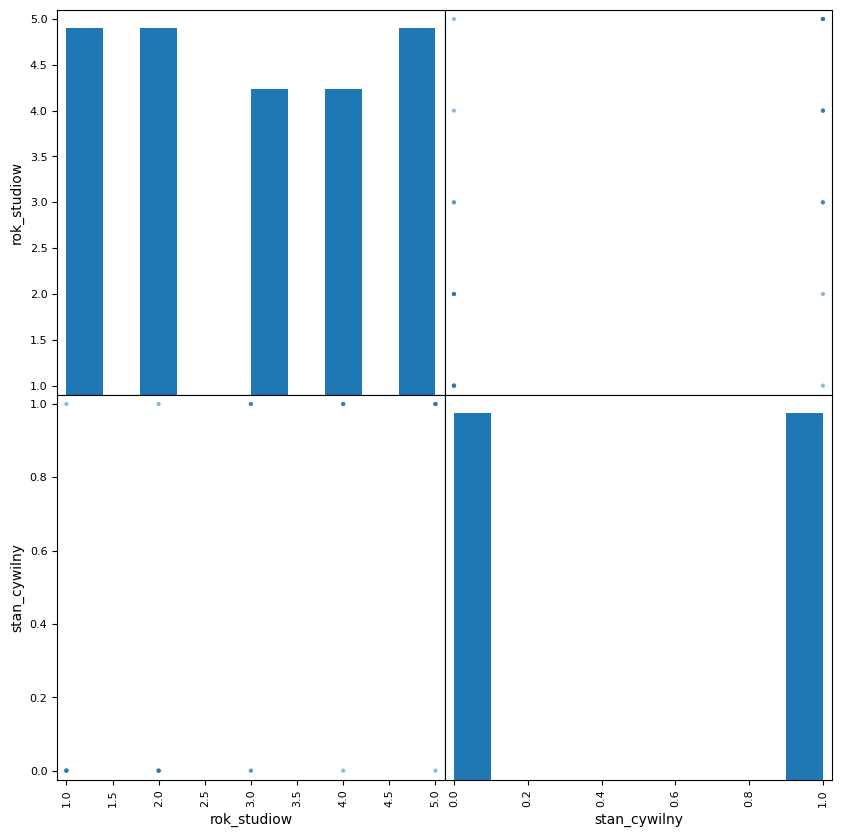

In [3]:
scatter_matrix(stanCywilny, figsize=(10, 10))

#### Wykres 1. Model liniowy prawdopodobieństwa

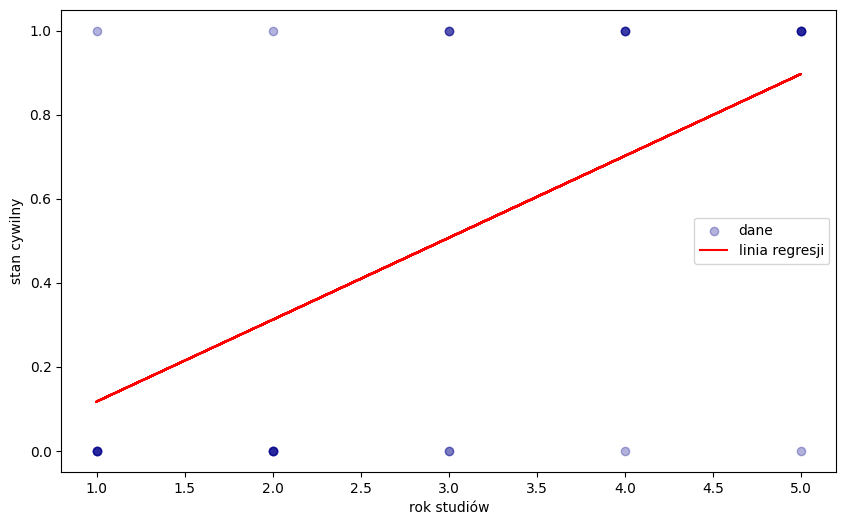

Prawdopodobieństwo wyjścia za mąż dla 1 roku studiów:  0.11689884918231361
Prawdopodobieństwo wyjścia za mąż dla 2 roku studiów:  0.311932162325863
Prawdopodobieństwo wyjścia za mąż dla 3 roku studiów:  0.5069654754694124
Prawdopodobieństwo wyjścia za mąż dla 4 roku studiów:  0.7019987886129618
Prawdopodobieństwo wyjścia za mąż dla 5 roku studiów:  0.8970321017565113 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     12.26
Date:                Thu, 02 Jan 2025   Prob (F-statistic):            0.00169
Time:                        14:26:24   Log-Likelihood:                -14.914
No. Observations:                  28   AIC:                             33.83
Df Residuals:                      26   BIC:                             36

In [18]:
x1 = np.array(stanCywilny["rok_studiow"]).reshape(-1, 1)
y1 = np.array(stanCywilny["stan_cywilny"]).reshape(-1,1)

model1 = LinearRegression()
model1.fit(x1, y1)

y1_pred = model1.predict(x1)

plt.figure(figsize=(10,6))
plt.scatter(x1, y1, color = 'darkblue', label = "dane", alpha = 0.3)
plt.plot(x1, y1_pred, color = 'red', label = "linia regresji")
plt.xlabel("rok studiów")
plt.ylabel("stan cywilny")
plt.legend()
plt.show()

print("Prawdopodobieństwo wyjścia za mąż dla 1 roku studiów: ", model1.predict(np.array([[1]]))[0][0])
print("Prawdopodobieństwo wyjścia za mąż dla 2 roku studiów: ", model1.predict(np.array([[2]]))[0][0])
print("Prawdopodobieństwo wyjścia za mąż dla 3 roku studiów: ", model1.predict(np.array([[3]]))[0][0])
print("Prawdopodobieństwo wyjścia za mąż dla 4 roku studiów: ", model1.predict(np.array([[4]]))[0][0])
print("Prawdopodobieństwo wyjścia za mąż dla 5 roku studiów: ", model1.predict(np.array([[5]]))[0][0], "\n")

x1 = sm.add_constant(x1)
model1 = sm.OLS(y1, x1).fit()
print(model1.summary())

#### Wykres 2. Model logitowy prawdopodobieństwa

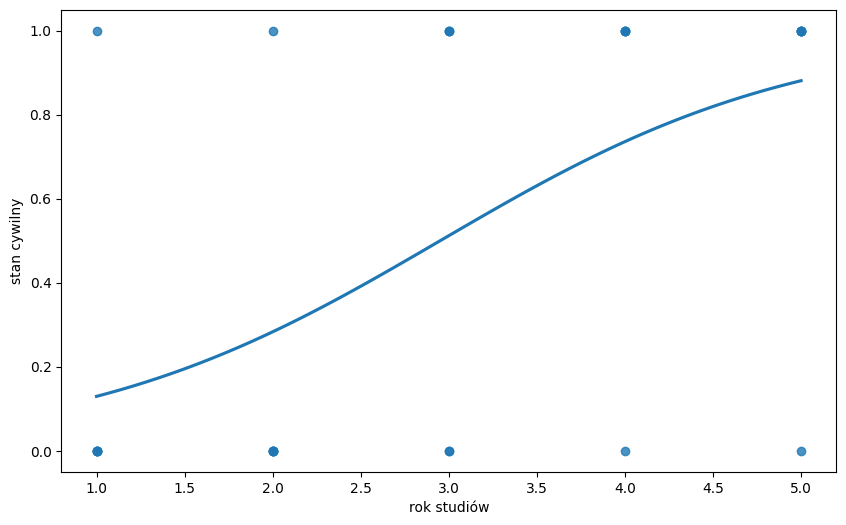

Prawdopodobieństwo wyjścia za mąż dla 1 roku studiów: 0.1551
Prawdopodobieństwo wyjścia za mąż dla 2 roku studiów: 0.3042
Prawdopodobieństwo wyjścia za mąż dla 3 roku studiów: 0.5100
Prawdopodobieństwo wyjścia za mąż dla 4 roku studiów: 0.7125
Prawdopodobieństwo wyjścia za mąż dla 5 roku studiów: 0.8551
Optimization terminated successfully.
         Current function value: 0.515254
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   28
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 Jan 2025   Pseudo R-squ.:                  0.2566
Time:                        14:28:20   Log-Likelihood:                -14.427
converged:                       True   LL-Null:                       -19.408
Covariance Type:            nonrobust   

In [20]:
x2 = np.array(stanCywilny["rok_studiow"]).reshape(-1,1)
y2 = np.array(stanCywilny["stan_cywilny"]).reshape(-1)

model2 = LogisticRegression()
model2.fit(x2, y2)
y2_pred = model2.predict(x2)

plt.figure(figsize=(10,6))
sns.regplot(x=x2, y=y2, data=stanCywilny, logistic=True, ci=None)
plt.xlabel("rok studiów")
plt.ylabel("stan cywilny")
plt.show()

# Prawdopodobieństwa dla różnych lat studiów
for rok in range(1, 6):
    prawdopodobienstwo = model2.predict_proba(np.array([[rok]]))[0][1]
    print(f"Prawdopodobieństwo wyjścia za mąż dla {rok} roku studiów: {prawdopodobienstwo:.4f}")

x2 = sm.add_constant(x2)
model2 = sm.Logit(y2, x2).fit()
print(model2.summary())

### Zadanie 2

In [22]:
bezrobotni = pd.read_excel('C://Users//Domin//Desktop//semestr5//MED//Lab1//LAB2//dane//bezrobotni.xlsx')
bezrobotni

,numer_grupy,liczba_bezrobotnych,wiek_bezrobotnych,sr_staz_pracy,liczba_bezrobotnych_z_praca
0,1,1000,19-22,1,100
1,2,1500,23-26,3,160
2,3,900,27-30,5,110
3,4,800,31-34,7,130
4,5,1000,35-38,9,180
5,6,800,39-42,20,200
6,7,400,43-46,20,110
7,8,200,47-50,25,60
8,9,100,51-54,28,33
9,10,400,55-58,27,13


array([[<Axes: xlabel='numer_grupy', ylabel='numer_grupy'>,
        <Axes: xlabel='liczba_bezrobotnych', ylabel='numer_grupy'>,
        <Axes: xlabel='sr_staz_pracy', ylabel='numer_grupy'>,
        <Axes: xlabel='liczba_bezrobotnych_z_praca', ylabel='numer_grupy'>],
       [<Axes: xlabel='numer_grupy', ylabel='liczba_bezrobotnych'>,
        <Axes: xlabel='liczba_bezrobotnych', ylabel='liczba_bezrobotnych'>,
        <Axes: xlabel='sr_staz_pracy', ylabel='liczba_bezrobotnych'>,
        <Axes: xlabel='liczba_bezrobotnych_z_praca', ylabel='liczba_bezrobotnych'>],
       [<Axes: xlabel='numer_grupy', ylabel='sr_staz_pracy'>,
        <Axes: xlabel='liczba_bezrobotnych', ylabel='sr_staz_pracy'>,
        <Axes: xlabel='sr_staz_pracy', ylabel='sr_staz_pracy'>,
        <Axes: xlabel='liczba_bezrobotnych_z_praca', ylabel='sr_staz_pracy'>],
       [<Axes: xlabel='numer_grupy', ylabel='liczba_bezrobotnych_z_praca'>,
        <Axes: xlabel='liczba_bezrobotnych', ylabel='liczba_bezrobotnych_z_praca'>,

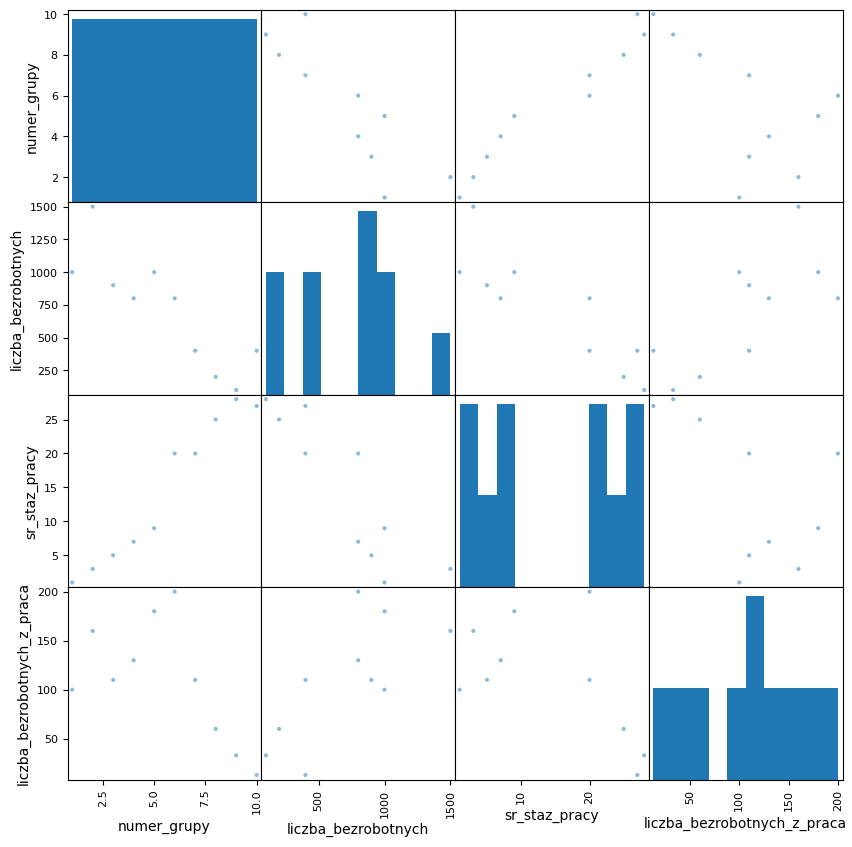

In [46]:
scatter_matrix(bezrobotni, figsize=(10, 10))

In [23]:
# Obliczenie średniego wieku (środek przedziału)
bezrobotni["sr_wiek"] = bezrobotni["wiek_bezrobotnych"].apply(lambda x: np.mean([int(i) for i in x.split('-')]))

# Generowanie "danych osobowych" dla klasyfikacji binarnej
rows = []
for _, row in bezrobotni.iterrows():
    # Osoby, które znalazły pracę (1)
    rows.extend([[row["sr_wiek"], row["sr_staz_pracy"], 1]] * row["liczba_bezrobotnych_z_praca"])
    # Osoby, które nie znalazły pracy (0)
    rows.extend([[row["sr_wiek"], row["sr_staz_pracy"], 0]] * (row["liczba_bezrobotnych"] - row["liczba_bezrobotnych_z_praca"]))

# Tworzenie DataFrame na podstawie przekształconych danych
full_data = pd.DataFrame(rows, columns=["wiek", "staz_pracy", "znalazl_prace"])
full_data


,wiek,staz_pracy,znalazl_prace
0,20.5,1,1
1,20.5,1,1
2,20.5,1,1
3,20.5,1,1
4,20.5,1,1
...,...,...,...
7095,56.5,27,0
7096,56.5,27,0
7097,56.5,27,0
7098,56.5,27,0


array([[<Axes: xlabel='wiek', ylabel='wiek'>,
        <Axes: xlabel='staz_pracy', ylabel='wiek'>,
        <Axes: xlabel='znalazl_prace', ylabel='wiek'>],
       [<Axes: xlabel='wiek', ylabel='staz_pracy'>,
        <Axes: xlabel='staz_pracy', ylabel='staz_pracy'>,
        <Axes: xlabel='znalazl_prace', ylabel='staz_pracy'>],
       [<Axes: xlabel='wiek', ylabel='znalazl_prace'>,
        <Axes: xlabel='staz_pracy', ylabel='znalazl_prace'>,
        <Axes: xlabel='znalazl_prace', ylabel='znalazl_prace'>]],
      dtype=object)

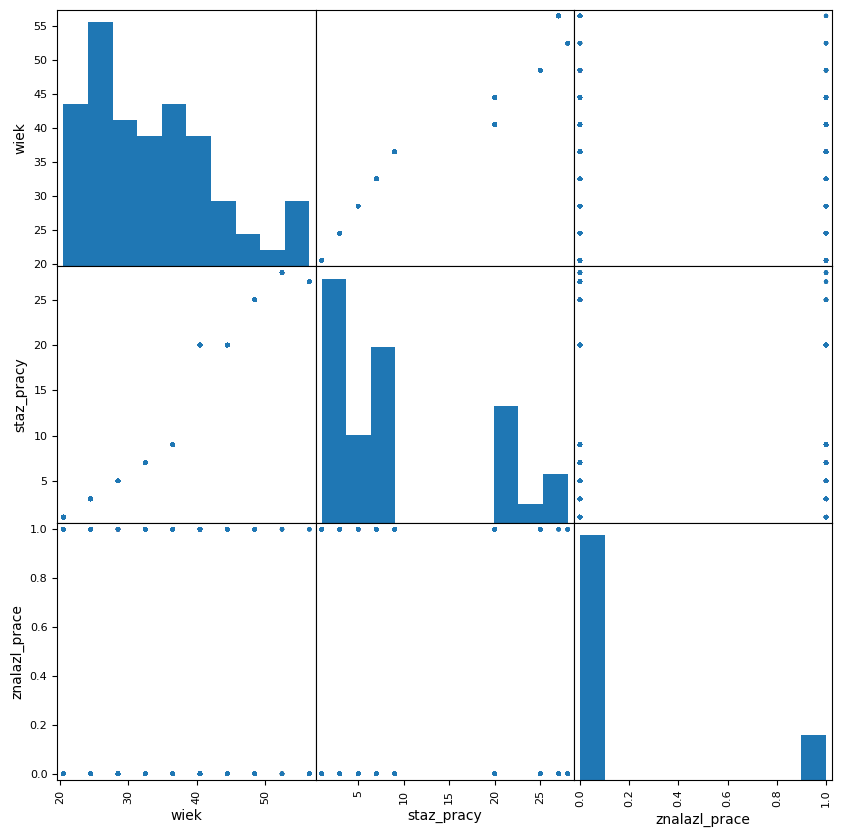

In [50]:
scatter_matrix(full_data, figsize=(10, 10))

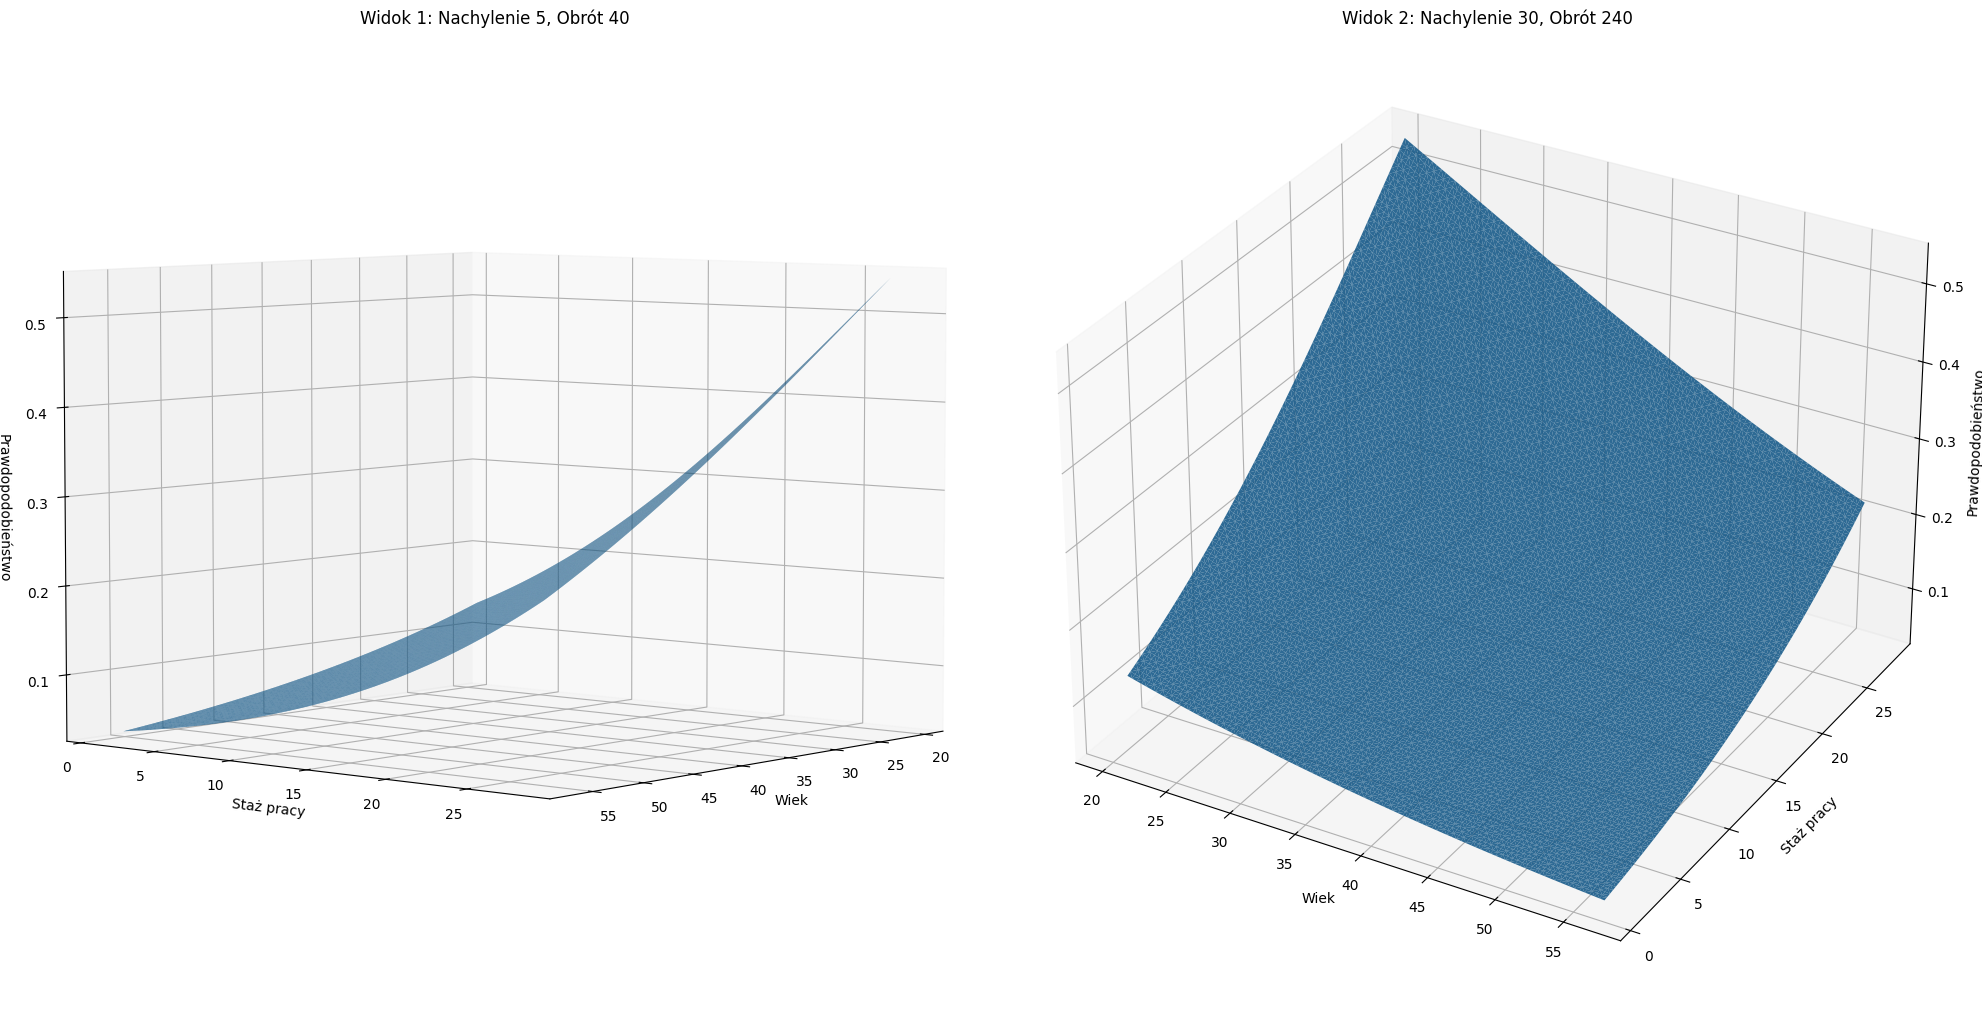

Optimization terminated successfully.
         Current function value: 0.424143
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          znalazl_prace   No. Observations:                 7100
Model:                          Logit   Df Residuals:                     7097
Method:                           MLE   Df Model:                            2
Date:                Thu, 02 Jan 2025   Pseudo R-squ.:                 0.01410
Time:                        15:05:46   Log-Likelihood:                -3011.4
converged:                       True   LL-Null:                       -3054.5
Covariance Type:            nonrobust   LLR p-value:                 1.978e-19
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1752      0.264     -4.458      0.000      -1.692      -0.659
wiek          -0.0389      0.

In [66]:
x3 = full_data[["wiek", "staz_pracy"]]
y3 = full_data["znalazl_prace"]

# 3. Trenowanie modelu
model3 = LogisticRegression()
model3.fit(x3, y3)

wiek_range = np.linspace(full_data["wiek"].min(), full_data["wiek"].max(), 100)
staz_range = np.linspace(full_data["staz_pracy"].min(), full_data["staz_pracy"].max(), 100)
wiek_grid, staz_grid = np.meshgrid(wiek_range, staz_range)

# Przygotowanie siatki punktów do przewidywań
X_grid = np.c_[wiek_grid.ravel(), staz_grid.ravel()]
X_grid = pd.DataFrame(X_grid, columns=["wiek", "staz_pracy"])

# Obliczanie prawdopodobieństwa przy użyciu wytrenowanego modelu
y_pred_grid = model3.predict_proba(X_grid)[:, 1].reshape(wiek_grid.shape)


# Tworzenie dwóch pod-wykresów w jednym rysunku
fig = plt.figure(figsize=(20, 10))

# Pierwszy wykres (ujęcie 1)
ax1 = fig.add_subplot(121, projection="3d")
surf1 = ax1.plot_trisurf(
    wiek_grid.ravel(),
    staz_grid.ravel(),
    y_pred_grid.ravel(),
    
    alpha=0.9,
    edgecolor="none"
)

ax1.view_init(elev=5, azim=40)
ax1.set_title("Widok 1: Nachylenie 5, Obrót 40")
ax1.set_xlabel("Wiek")
ax1.set_ylabel("Staż pracy")
ax1.set_zlabel("Prawdopodobieństwo")

# Drugi wykres (ujęcie 2)
ax2 = fig.add_subplot(122, projection="3d")
surf2 = ax2.plot_trisurf(
    wiek_grid.ravel(),
    staz_grid.ravel(),
    y_pred_grid.ravel(),
    alpha=0.9,
    edgecolor="none"
)

ax2.set_title("Widok 2: Nachylenie 30, Obrót 240")
ax2.set_xlabel("Wiek")
ax2.set_ylabel("Staż pracy")
ax2.set_zlabel("Prawdopodobieństwo")
plt.tight_layout()
plt.show()

# Obliczanie dokładności modelu
x3 = sm.add_constant(x3)
model3 = sm.Logit(y3, x3).fit()
print(model3.summary())

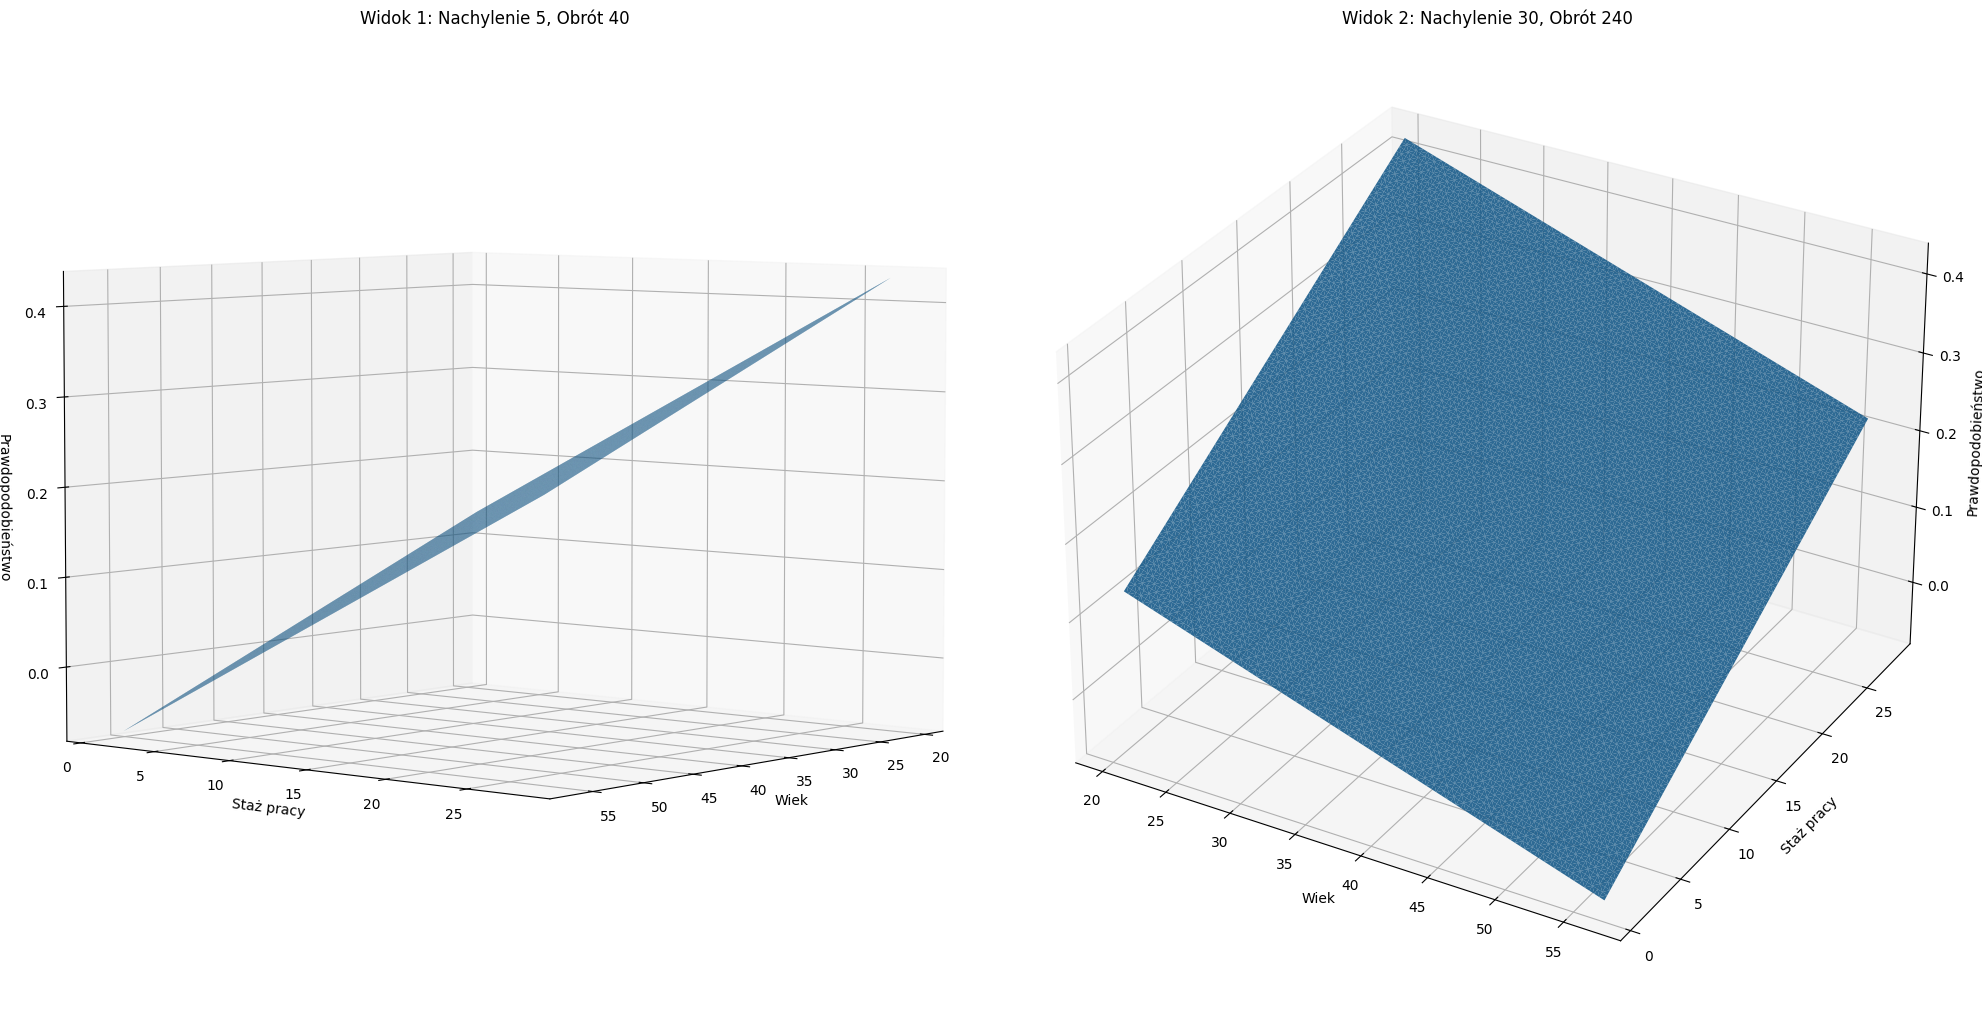

                            OLS Regression Results                            
Dep. Variable:          znalazl_prace   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     46.57
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           8.04e-21
Time:                        21:24:58   Log-Likelihood:                -2800.0
No. Observations:                7100   AIC:                             5606.
Df Residuals:                    7097   BIC:                             5627.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2357      0.035      6.755      0.0

In [85]:
# Przygotowanie danych
x4 = full_data[["wiek", "staz_pracy"]]
y4 = full_data["znalazl_prace"]

model4 = LinearRegression()
model4.fit(x4, y4)

wiek_range = np.linspace(full_data["wiek"].min(), full_data["wiek"].max(), 100)
staz_range = np.linspace(full_data["staz_pracy"].min(), full_data["staz_pracy"].max(), 100)
wiek_grid, staz_grid = np.meshgrid(wiek_range, staz_range)

# Przygotowanie siatki punktów do przewidywań
X_grid = np.c_[wiek_grid.ravel(), staz_grid.ravel()]
X_grid = pd.DataFrame(X_grid, columns=["wiek", "staz_pracy"])

# Obliczanie przewidywanych wartości przy użyciu wytrenowanego modelu
y_pred_grid = model4.predict(X_grid).reshape(wiek_grid.shape)

# Tworzenie dwóch pod-wykresów w jednym rysunku
fig = plt.figure(figsize=(20, 10))

# Pierwszy wykres (ujęcie 1)
ax1 = fig.add_subplot(121, projection="3d")
surf1 = ax1.plot_trisurf(
    wiek_grid.ravel(),
    staz_grid.ravel(),
    y_pred_grid.ravel(),
    alpha=0.9,
    edgecolor="none"
)

ax1.view_init(elev=5, azim=40)
ax1.set_title("Widok 1: Nachylenie 5, Obrót 40")
ax1.set_xlabel("Wiek")
ax1.set_ylabel("Staż pracy")
ax1.set_zlabel("Prawdopodobieństwo")

# Drugi wykres (ujęcie 2)
ax2 = fig.add_subplot(122, projection="3d")
surf2 = ax2.plot_trisurf(
    wiek_grid.ravel(),
    staz_grid.ravel(),
    y_pred_grid.ravel(),
    alpha=0.9,
    edgecolor="none"
)

ax2.set_title("Widok 2: Nachylenie 30, Obrót 240")
ax2.set_xlabel("Wiek")
ax2.set_ylabel("Staż pracy")
ax2.set_zlabel("Prawdopodobieństwo")
plt.tight_layout()
plt.show()

x4 = sm.add_constant(x4)
model4 = sm.OLS(y4, x4).fit()
print(model4.summary())

### Zadanie 3

In [70]:
bledyOS = pd.read_excel('C://Users//Domin//Desktop//semestr5//MED//Lab1//LAB2//dane//bledyOS.xlsx')
bledyOS

,nr_miesiaca,liczba_bledow
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
88,89,2
89,90,1
90,91,2
91,92,1


array([[<Axes: xlabel='nr_miesiaca', ylabel='nr_miesiaca'>,
        <Axes: xlabel='liczba_bledow', ylabel='nr_miesiaca'>],
       [<Axes: xlabel='nr_miesiaca', ylabel='liczba_bledow'>,
        <Axes: xlabel='liczba_bledow', ylabel='liczba_bledow'>]],
      dtype=object)

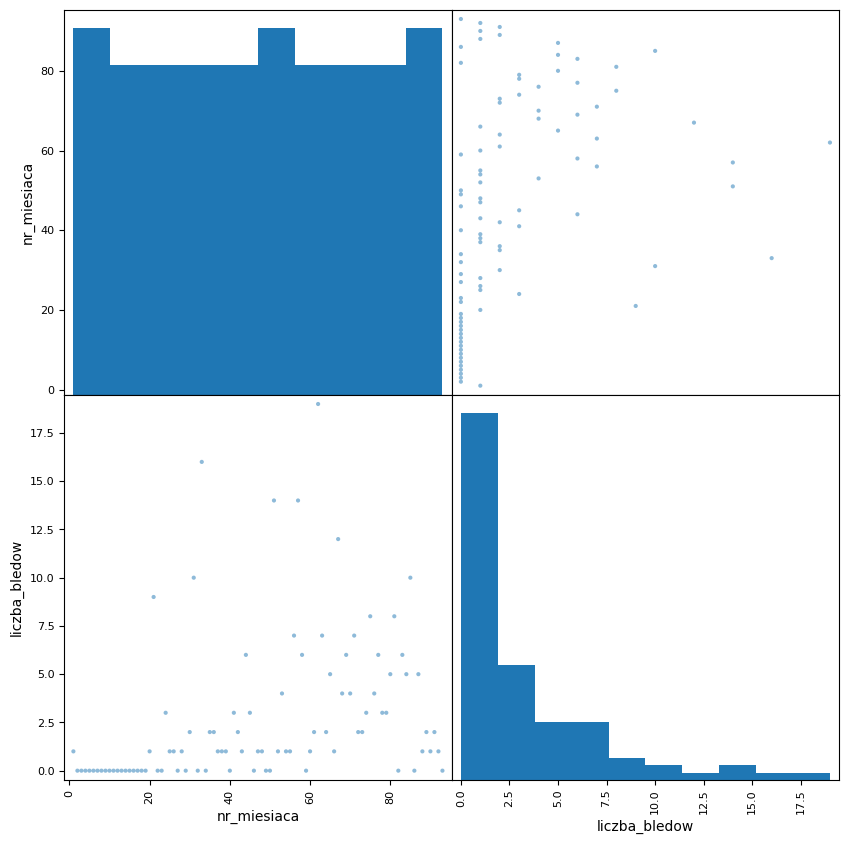

In [22]:
scatter_matrix(bledyOS, figsize=(10, 10))

In [71]:
bledyOS['suma'] = 0
liczba = 0

for a in range(93):
    liczba += bledyOS.loc[a, "liczba_bledow"]
    bledyOS.loc[a, "suma"] = liczba

print(bledyOS)

    nr_miesiaca  liczba_bledow  suma
0             1              1     1
1             2              0     1
2             3              0     1
3             4              0     1
4             5              0     1
..          ...            ...   ...
88           89              2   260
89           90              1   261
90           91              2   263
91           92              1   264
92           93              0   264

[93 rows x 3 columns]


array([[<Axes: xlabel='nr_miesiaca', ylabel='nr_miesiaca'>,
        <Axes: xlabel='liczba_bledow', ylabel='nr_miesiaca'>,
        <Axes: xlabel='suma', ylabel='nr_miesiaca'>],
       [<Axes: xlabel='nr_miesiaca', ylabel='liczba_bledow'>,
        <Axes: xlabel='liczba_bledow', ylabel='liczba_bledow'>,
        <Axes: xlabel='suma', ylabel='liczba_bledow'>],
       [<Axes: xlabel='nr_miesiaca', ylabel='suma'>,
        <Axes: xlabel='liczba_bledow', ylabel='suma'>,
        <Axes: xlabel='suma', ylabel='suma'>]], dtype=object)

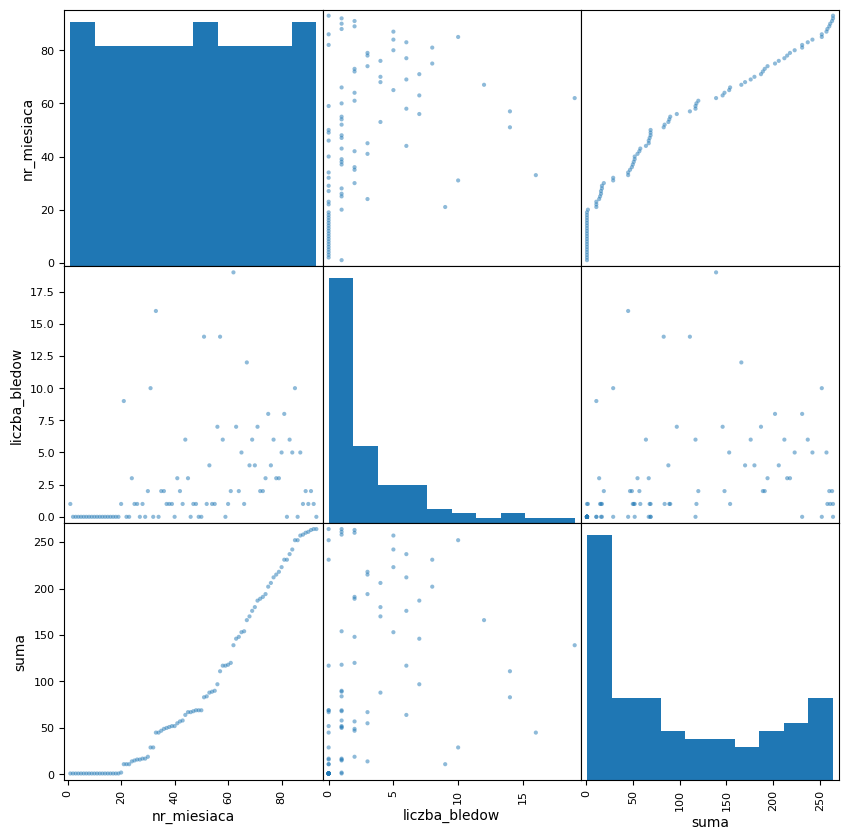

In [24]:
scatter_matrix(bledyOS, figsize=(10, 10))

### Zadanie 4

In [87]:
cereals = pd.read_excel('C://Users//Domin//Desktop//semestr5//MED//Lab1//LAB2//dane//cereals.xlsx')

# Zamiana wartości 'N' na 0 i 'T' na 1 w kolumnie 'srodk_polka'
cereals['srodk_polka'] = cereals['srodk_polka'].replace({'N': 0, 'T': 1})

cereals

C:\Users\Domin\AppData\Local\Temp\ipykernel_17648\3192622004.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cereals['srodk_polka'] = cereals['srodk_polka'].replace({'N': 0, 'T': 1})


,nazwa,producent,kalorie,cukry,weglowodany,proteiny,tluszcz,sod,blonnik,potas,Liczba_polek,srodk_polka,polka_1,polka_2,polka_3
0,100%_Bran,N,70,6,5.0,4,1,130,10.0,280,3,0,0,0,1
1,100%_Natural_Bran,Q,120,8,8.0,3,5,15,2.0,135,3,0,0,0,1
2,All-Bran,K,70,5,7.0,4,1,260,9.0,320,3,0,0,0,1
3,All-Bran_with_Extra_Fiber,K,50,0,8.0,4,0,140,14.0,330,3,0,0,0,1
4,Almond_Delight,R,110,8,14.0,2,2,200,1.0,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,110,3,21.0,2,1,250,0.0,60,3,0,0,0,1
73,Trix,G,110,12,13.0,1,1,140,0.0,25,2,1,0,1,0
74,Wheat_Chex,R,100,3,17.0,3,1,230,3.0,115,1,0,1,0,0
75,Wheaties,G,100,3,17.0,3,1,200,3.0,110,1,0,1,0,0


array([[<Axes: xlabel='kalorie', ylabel='kalorie'>,
        <Axes: xlabel='cukry', ylabel='kalorie'>,
        <Axes: xlabel='weglowodany', ylabel='kalorie'>,
        <Axes: xlabel='proteiny', ylabel='kalorie'>,
        <Axes: xlabel='tluszcz', ylabel='kalorie'>,
        <Axes: xlabel='sod', ylabel='kalorie'>,
        <Axes: xlabel='blonnik', ylabel='kalorie'>,
        <Axes: xlabel='potas', ylabel='kalorie'>,
        <Axes: xlabel='Liczba_polek', ylabel='kalorie'>,
        <Axes: xlabel='srodk_polka', ylabel='kalorie'>,
        <Axes: xlabel='polka_1', ylabel='kalorie'>,
        <Axes: xlabel='polka_2', ylabel='kalorie'>,
        <Axes: xlabel='polka_3', ylabel='kalorie'>],
       [<Axes: xlabel='kalorie', ylabel='cukry'>,
        <Axes: xlabel='cukry', ylabel='cukry'>,
        <Axes: xlabel='weglowodany', ylabel='cukry'>,
        <Axes: xlabel='proteiny', ylabel='cukry'>,
        <Axes: xlabel='tluszcz', ylabel='cukry'>,
        <Axes: xlabel='sod', ylabel='cukry'>,
        <Axes: xla

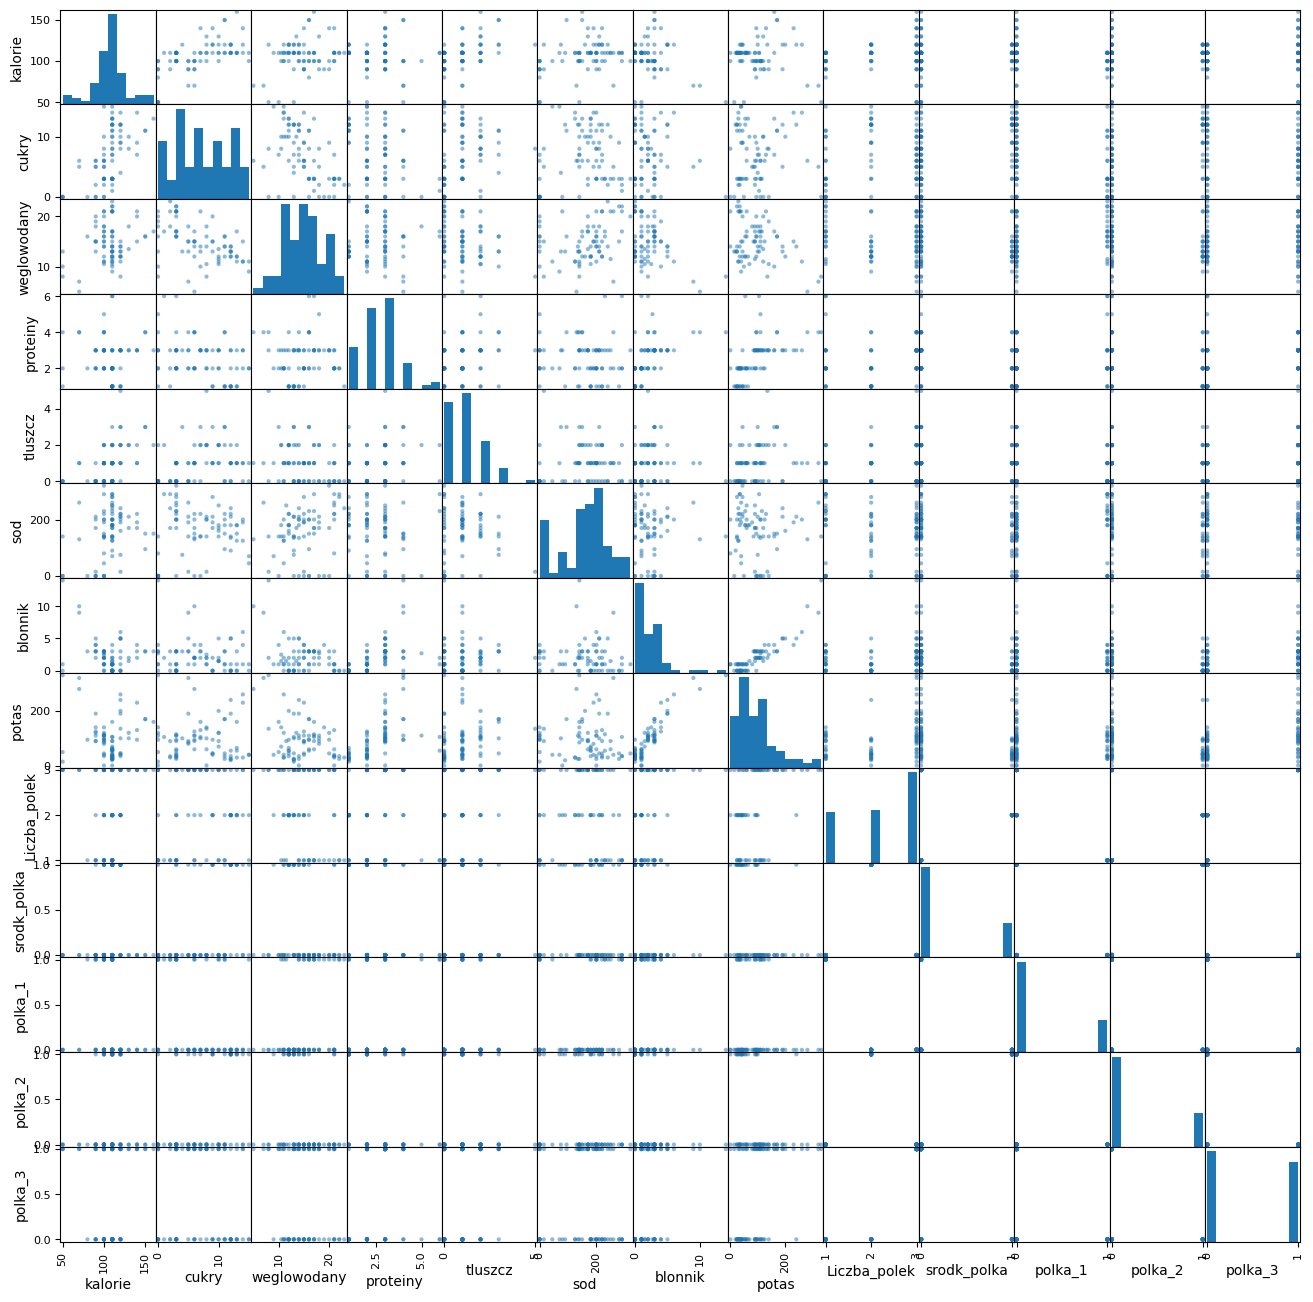

In [7]:
scatter_matrix(cereals, figsize=(16, 16))

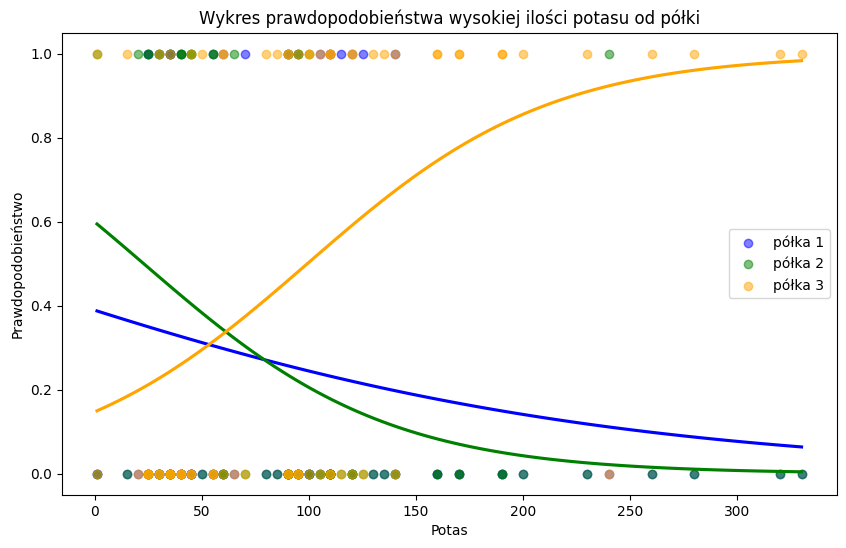

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.306
Date:                Thu, 02 Jan 2025   Prob (F-statistic):              0.133
Time:                        21:54:34   Log-Likelihood:                -44.612
No. Observations:                  77   AIC:                             93.22
Df Residuals:                      75   BIC:                             97.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3626      0.084      4.310      0.0

In [94]:
x6 = np.array(cereals["potas"]).reshape(-1, 1)
y6_1 = np.array(cereals["polka_1"]).reshape(-1)
y6_2 = np.array(cereals["polka_2"]).reshape(-1)
y6_3 = np.array(cereals["polka_3"]).reshape(-1)

# Utworzenie i dopasowanie modeli regresji logistycznej
model6_1 = LogisticRegression()
model6_1.fit(x6, y6_1)
y6_pred_1 = model6_1.predict_proba(x6)[:, 1]

model6_2 = LogisticRegression()
model6_2.fit(x6, y6_2)
y6_pred_2 = model6_2.predict_proba(x6)[:, 1]

model6_3 = LogisticRegression()
model6_3.fit(x6, y6_3)
y6_pred_3 = model6_3.predict_proba(x6)[:, 1]

# Tworzenie wykresu
plt.figure(figsize=(10, 6))

sns.regplot(x=cereals["potas"], y=cereals["polka_1"], logistic=True, ci=None, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'blue'}, label='półka 1')

sns.regplot(x=cereals["potas"], y=cereals["polka_2"], logistic=True, ci=None, scatter_kws={'color': 'green', 'alpha': 0.5}, line_kws={'color': 'green'}, label='półka 2')

sns.regplot(x=cereals["potas"], y=cereals["polka_3"], logistic=True, ci=None, scatter_kws={'color': 'orange', 'alpha': 0.5}, line_kws={'color': 'orange'}, label='półka 3')

plt.xlabel("Potas")
plt.ylabel("Prawdopodobieństwo")
plt.title("Wykres prawdopodobieństwa wysokiej ilości potasu od półki")
plt.legend()
plt.show()

x6 = sm.add_constant(x6)
model6_1 = sm.OLS(y6_1, x6).fit()
print(model6_1.summary())

x6 = sm.add_constant(x6)
model6_2 = sm.OLS(y6_2, x6).fit()
print(model6_2.summary())

x6 = sm.add_constant(x6)
model6_3 = sm.OLS(y6_3, x6).fit()
print(model6_3.summary())


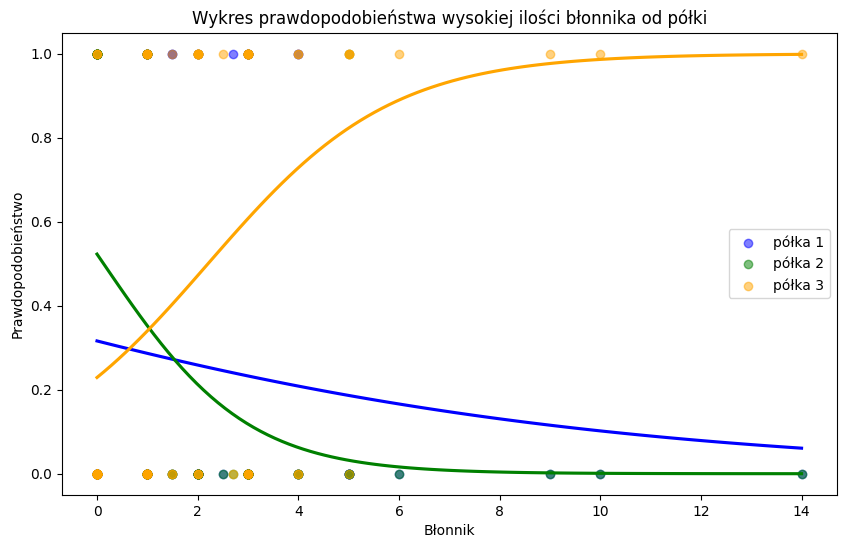

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.038
Date:                Thu, 02 Jan 2025   Prob (F-statistic):              0.312
Time:                        22:05:51   Log-Likelihood:                -45.249
No. Observations:                  77   AIC:                             94.50
Df Residuals:                      75   BIC:                             99.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3063      0.068      4.508      0.0

In [96]:
x7 = np.array(cereals["blonnik"]).reshape(-1, 1)
y7_1 = np.array(cereals["polka_1"]).reshape(-1)
y7_2 = np.array(cereals["polka_2"]).reshape(-1)
y7_3 = np.array(cereals["polka_3"]).reshape(-1)

# Utworzenie i dopasowanie modeli regresji logistycznej
model7_1 = LogisticRegression()
model7_1.fit(x7, y7_1)
y7_pred_1 = model7_1.predict_proba(x7)[:, 1]

model7_2 = LogisticRegression()
model7_2.fit(x7, y7_2)
y7_pred_2 = model7_2.predict_proba(x7)[:, 1]

model7_3 = LogisticRegression()
model7_3.fit(x7, y7_3)
y7_pred_3 = model7_3.predict_proba(x7)[:, 1]

# Tworzenie wykresu
plt.figure(figsize=(10, 6))

sns.regplot(x=cereals["blonnik"], y=cereals["polka_1"], logistic=True, ci=None, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'blue'}, label='półka 1')

sns.regplot(x=cereals["blonnik"], y=cereals["polka_2"], logistic=True, ci=None, scatter_kws={'color': 'green', 'alpha': 0.5}, line_kws={'color': 'green'}, label='półka 2')

sns.regplot(x=cereals["blonnik"], y=cereals["polka_3"], logistic=True, ci=None, scatter_kws={'color': 'orange', 'alpha': 0.5}, line_kws={'color': 'orange'}, label='półka 3')

plt.xlabel("Błonnik")
plt.ylabel("Prawdopodobieństwo")
plt.title("Wykres prawdopodobieństwa wysokiej ilości błonnika od półki")
plt.legend()
plt.show()

x7 = sm.add_constant(x7)
model7_1 = sm.OLS(y7_1, x7).fit()
print(model7_1.summary())

x7 = sm.add_constant(x7)
model7_2 = sm.OLS(y7_2, x7).fit()
print(model7_2.summary())

x7 = sm.add_constant(x7)
model7_3 = sm.OLS(y7_3, x7).fit()
print(model7_3.summary())

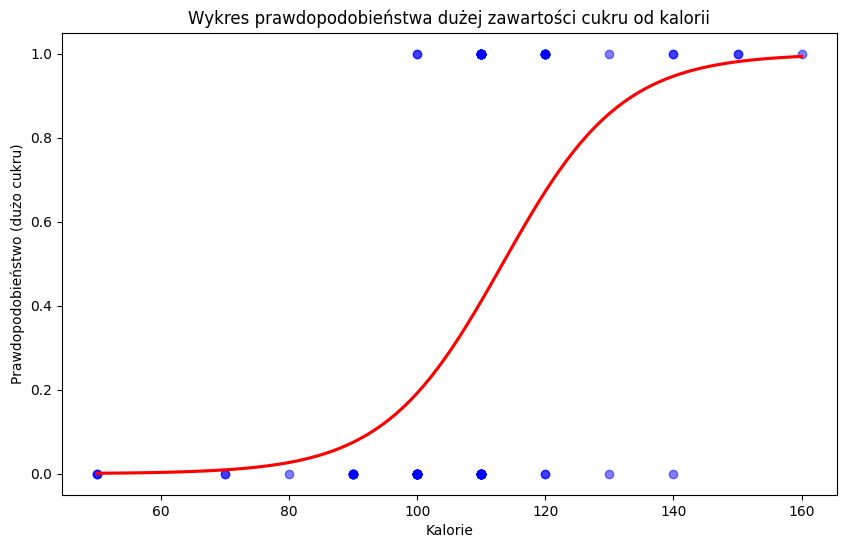

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     25.01
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           3.64e-06
Time:                        22:08:00   Log-Likelihood:                -42.881
No. Observations:                  77   AIC:                             89.76
Df Residuals:                      75   BIC:                             94.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9570      0.274     -3.497      0.0

In [97]:
# przyjmujemy wartość 8 jako próg dla dużej zawartości cukru
cereals['duzo_cukru'] = (cereals['cukry'] > 8).astype(int)

x8 = np.array(cereals["kalorie"]).reshape(-1, 1)
y8 = np.array(cereals["duzo_cukru"]).reshape(-1)

model8 = LogisticRegression()
model8.fit(x8, y8)

# Przewidywanie wartości
y8_pred = model8.predict_proba(x8)[:, 1]

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
sns.regplot(x=cereals["kalorie"], y=cereals["duzo_cukru"], logistic=True, ci=None, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel("Kalorie")
plt.ylabel("Prawdopodobieństwo (dużo cukru)")
plt.title("Wykres prawdopodobieństwa dużej zawartości cukru od kalorii")
plt.show()

# Wyświetlenie metryk
x8 = sm.add_constant(x8)
model8 = sm.OLS(y8, x8).fit()
print(model8.summary())

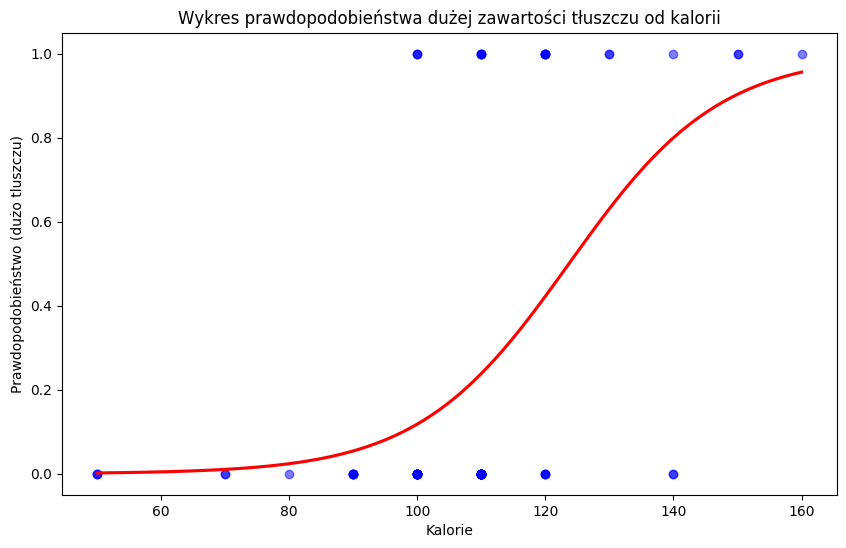

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     18.76
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           4.54e-05
Time:                        22:30:10   Log-Likelihood:                -37.184
No. Observations:                  77   AIC:                             78.37
Df Residuals:                      75   BIC:                             83.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8232      0.254     -3.240      0.0

In [98]:
# przyjmujemy wartość 8 jako próg dla dużej zawartości cukru
cereals['duzo_tluszczu'] = (cereals['tluszcz'] > 1).astype(int)

x9 = np.array(cereals["kalorie"]).reshape(-1, 1)
y9 = np.array(cereals["duzo_tluszczu"]).reshape(-1)

model9 = LogisticRegression()
model9.fit(x9, y9)

# Przewidywanie wartości
y9_pred = model9.predict_proba(x9)[:, 1]

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
sns.regplot(x=cereals["kalorie"], y=cereals["duzo_tluszczu"], logistic=True, ci=None, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel("Kalorie")
plt.ylabel("Prawdopodobieństwo (dużo tluszczu)")
plt.title("Wykres prawdopodobieństwa dużej zawartości tłuszczu od kalorii")
plt.show()

# Wyświetlenie metryk
x9 = sm.add_constant(x9)
model9 = sm.OLS(y9, x9).fit()
print(model9.summary())